<a href="https://colab.research.google.com/github/diogenesjusto/FIAP/blob/master/Gradua%C3%A7%C3%A3o/2024/20240430_Variaveis_Dummy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Carga de bibliotecas
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE
import statsmodels.api as sm

# Carga de dados
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/SHIFT/Data/pib.csv")

# Tratamento de dados
# Separação do mês
# Construação coluna mês
df['MES'] = df.ANO_MES.str.slice(stop=3)
# Construção da dummy
# pd.get_dummies(df['MES'])

# Separação de treino e teste
treino = df.iloc[0:126]
teste = df.iloc[126:138]

# Regressão
Y_treino = treino.iloc[:,[2]]
X = ['BRL', 'BRP', 'D2', 'D6'] # Regressão Linear Simples

X_treino = treino.loc[:,X]
mod = LinearRegression()
mod.fit(X_treino, Y_treino)
# Análise de coeficientes
print(mod.coef_)
print(mod.intercept_)

# Cálculo de erro com python
X_teste = teste.loc[:,X]
Y_prev = mod.predict(X_teste)
Y_real = teste.loc[:,['PIB']]
Erro = Y_prev - Y_real

# Erro de previsão
print(MAE(Y_real, Y_prev))

[[0.25270186 0.60000404 4.05082693 5.28245002]]
[15.47474614]
2.098132583133508


In [24]:
# Análise do R2
print(mod.score(X_treino, Y_treino))

0.9595600920071907


In [25]:
# Análise do p-valor
# Visualização das estatísticas da regressão
mod_sm = sm.OLS(Y_treino,X_treino).fit()
print(mod_sm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    PIB   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          4.078e+04
Date:                Wed, 01 May 2024   Prob (F-statistic):                   1.20e-189
Time:                        01:33:48   Log-Likelihood:                         -340.84
No. Observations:                 126   AIC:                                      689.7
Df Residuals:                     122   BIC:                                      701.0
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Análise gráfica

,abr,ago,dez,fev,jan,jul,jun,mai,mar,nov,out,set
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
133,False,False,False,True,False,False,False,False,False,False,False,False
134,False,False,False,False,False,False,False,False,True,False,False,False
135,True,False,False,False,False,False,False,False,False,False,False,False
136,False,False,False,False,False,False,False,True,False,False,False,False


<Axes: >

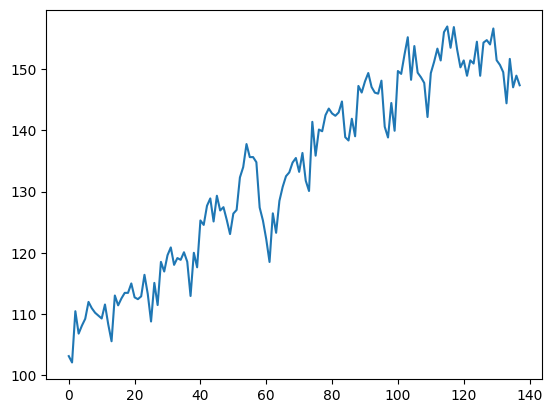

In [2]:
df['PIB'].plot()

<Axes: title={'center': 'PIB'}, xlabel='MES'>

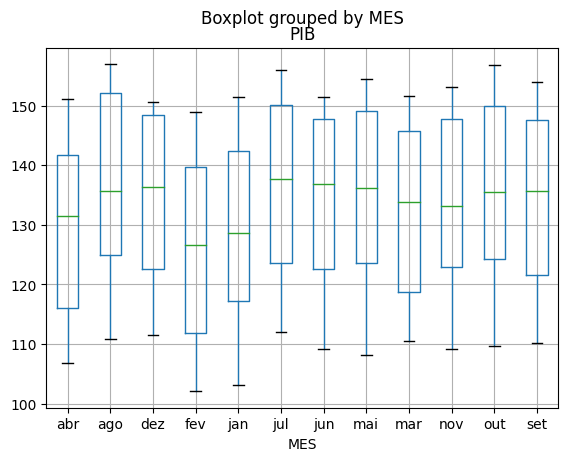

In [8]:
# Análise gráfica de categorias/meses utilizando o box-Plot
# Aplicação em sazonalidades
df.boxplot(['PIB'], by='MES')

In [12]:
df.iloc[:,2:26].corr()

,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,PRP,PRT,...,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11
PIB,1.000000,0.875316,0.945026,0.923355,0.912627,0.940794,0.951017,0.733248,0.839292,0.825325,...,-0.138529,-0.010753,-0.060057,0.034325,0.022511,0.053221,0.067080,0.029151,0.054142,0.011132
BRL,0.875316,1.000000,0.767459,0.991358,0.993062,0.746181,0.972831,0.955565,0.718522,0.981076,...,-0.087375,-0.036694,-0.043543,-0.064403,-0.125938,0.009481,-0.055081,-0.061940,0.005206,-0.000313
BRP,0.945026,0.767459,1.000000,0.844730,0.820792,0.995076,0.888951,0.592349,0.902659,0.723687,...,-0.261317,0.070241,-0.046553,0.059065,-0.028960,0.059401,0.136461,0.070203,0.144154,0.021748
BRT,0.923355,0.991358,0.844730,1.000000,0.996182,0.826268,0.993391,0.919659,0.782612,0.967285,...,-0.125781,-0.019014,-0.046305,-0.041918,-0.112621,0.020365,-0.018150,-0.037611,0.034423,0.003553
SLP,0.912627,0.993062,0.820792,0.996182,1.000000,0.802807,0.990845,0.919804,0.759298,0.961229,...,-0.130587,-0.033102,-0.013562,-0.039946,-0.104148,0.020913,-0.035379,-0.045753,0.020834,0.014405
SPP,0.940794,0.746181,0.995076,0.826268,0.802807,1.000000,0.875741,0.570393,0.866241,0.696353,...,-0.261466,0.030914,-0.063203,0.052025,-0.019048,0.058296,0.148363,0.096963,0.155415,0.043144
SPT,0.951017,0.972831,0.888951,0.993391,0.990845,0.875741,1.000000,0.875226,0.808810,0.936562,...,-0.163570,-0.020160,-0.025174,-0.021514,-0.091521,0.030575,0.004635,-0.015576,0.050965,0.020894
PRL,0.733248,0.955565,0.592349,0.919659,0.919804,0.570393,0.875226,1.000000,0.556847,0.978079,...,-0.042394,-0.077965,-0.054919,-0.114480,-0.162559,0.002122,-0.120731,-0.081869,-0.057020,-0.037631
PRP,0.839292,0.718522,0.902659,0.782612,0.759298,0.866241,0.808810,0.556847,1.000000,0.717468,...,-0.151261,0.209527,0.021026,0.086605,0.000615,0.066946,0.112631,-0.008767,0.035660,-0.092237
PRT,0.825325,0.981076,0.723687,0.967285,0.961229,0.696353,0.936562,0.978079,0.717468,1.000000,...,-0.073885,-0.015715,-0.042274,-0.074267,-0.136971,0.018520,-0.072448,-0.069098,-0.036850,-0.055046
